           Date  Prev Close     Open     High      Low     Last    Close  \
0    2019-04-01     1492.70  1496.75  1504.00  1490.00  1493.00  1492.75   
1    2019-04-02     1492.75  1493.00  1523.45  1484.55  1522.75  1519.30   
2    2019-04-03     1519.30  1521.25  1529.85  1493.00  1503.00  1497.60   
3    2019-04-04     1497.60  1504.80  1525.00  1503.00  1517.50  1519.00   
4    2019-04-05     1519.00  1520.00  1523.65  1503.00  1513.90  1514.45   
..          ...         ...      ...      ...      ...      ...      ...   
241  2020-03-24     1498.45  1556.55  1598.00  1453.25  1536.00  1524.85   
242  2020-03-25     1524.85  1446.55  1605.35  1446.00  1580.05  1593.15   
243  2020-03-26     1593.15  1605.00  1650.00  1574.00  1617.05  1616.95   
244  2020-03-27     1616.95  1664.80  1665.25  1550.20  1618.00  1604.15   
245  2020-03-30     1604.15  1591.15  1619.50  1559.05  1596.00  1594.95   

        VWAP   Volume      Turnover    Trades  Deliverable Volume  %Deliverble  
0    1

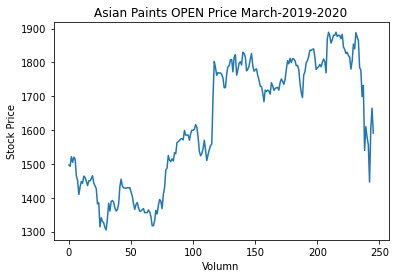

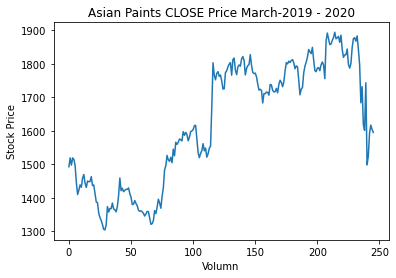

Average HIGH Asian Paints Stock:  1641.928252032521 
Average LOW Asian Paints:  1603.5215447154465 
Average VOLUME for Asian Paints:  1467082.2764227642 
Average DELIVERABLE VOLUME of Asian Paints:  674810.7926829269


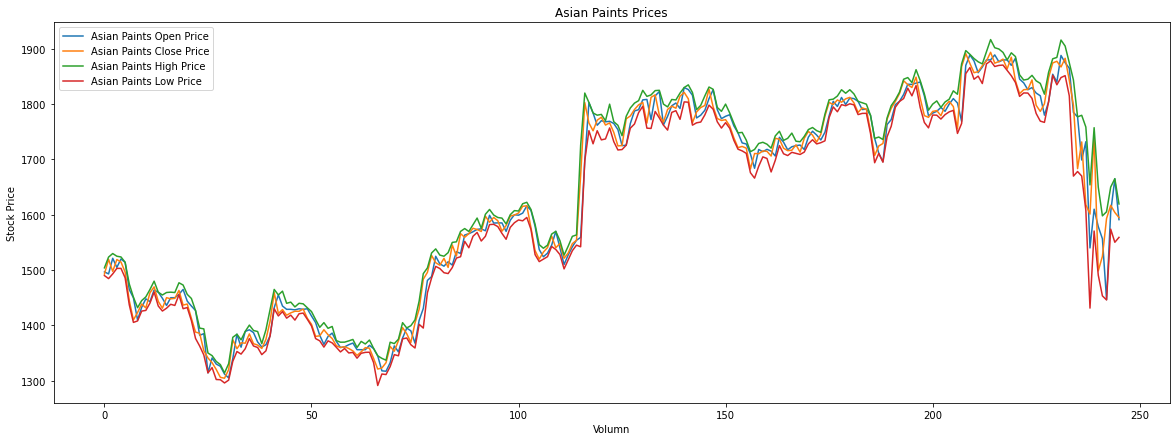

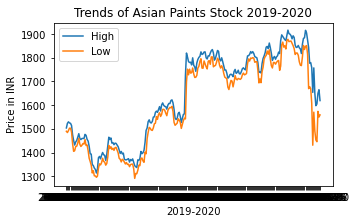

Text(0.5, 1.0, 'Types of volume in Asian Paints Stocks')

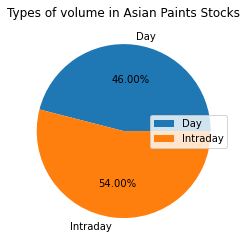

In [2]:
import pandas as pd # data processing, CSV file I/O (dataframe)
import csv # For csv file opening 
import matplotlib.pyplot as plt #Input data files are available in the read-only (visualisation)
with open('ASIANPAINT.csv',mode='r') as file:
    csvFile = csv.reader(file)

    
    AP_df = pd.read_csv("ASIANPAINT.csv")
    AP_df=AP_df.drop(['Series','Symbol'], axis=1) #Series and Symbol columns are for no use in the analysis. Se wee need to drop these
    AP_df = AP_df.dropna() #drop null values
    AP_df=AP_df.reset_index() #resest because data is shuffled 
    
    start_date = "2019-03-30" 
    end_date = "2020-03-30"

m = (AP_df['Date'] >= start_date) & (AP_df['Date'] <= end_date)
AP_df1 = AP_df.loc[m]
AP_df1 = AP_df1.reset_index()
AP_df1 = AP_df1.drop(['index'], axis=1) # removing extra colum index
AP_df1=AP_df1.drop(['level_0'], axis=1) # removing extra colum level_0
print(AP_df1) #plot graph

# Starting price in graph
AP_df1['Open'].plot()
plt.title("Asian Paints OPEN Price March-2019-2020") 
plt.xlabel("Volumn")
plt.ylabel("Stock Price")
plt.show()

#Ending price in graph
AP_df1['Close'].plot()
plt.title("Asian Paints CLOSE Price March-2019 - 2020")
plt.xlabel("Volumn")
plt.ylabel("Stock Price")
plt.show()

# To find Average for data analysis 
AvgHigh = AP_df1.describe()['High']['mean'] 
AvgLow = AP_df1.describe()['Low']['mean'] 
AvgVolume = AP_df1.describe()['Volume']['mean'] 
AvgDeliverable_volume=AP_df1.describe()['Deliverable Volume']['mean'] 

print("Average HIGH Asian Paints Stock: ",AvgHigh,
     "\nAverage LOW Asian Paints: ",AvgLow,
     "\nAverage VOLUME for Asian Paints: ", AvgVolume,
     "\nAverage DELIVERABLE VOLUME of Asian Paints: ", AvgDeliverable_volume)

# Mixed Graph for better investment
plt.figure(figsize=(20,7));
AP_df1['Open'].plot(label = 'Asian Paints Open Price')
AP_df1['Close'].plot(label = 'Asian Paints Close Price')
AP_df1['High'].plot(label= 'Asian Paints High Price')
AP_df1['Low'].plot(label= 'Asian Paints Low Price')
plt.legend()
plt.title('Asian Paints Prices')
plt.ylabel("Stock Price")
plt.xlabel("Volumn")
plt.show()

# To show variance between high and low due to trend
plt.figure(figsize=(5,3));
plt.plot(AP_df1.Date, AP_df1.High);
plt.plot(AP_df1.Date, AP_df1.Low);
plt.title("Trends of Asian Paints Stock 2019-2020");
plt.xlabel('2019-2020');
plt.ylabel('Price in INR');
plt.legend(['High','Low']);
plt.show()


AP_df1['Intraday Volume'] = AP_df1['Volume'] - AP_df1['Deliverable Volume'] #Formula for intraday volumn.
#To analyse trading between intraday and long term
piechart_vars = ['Day','Intraday'];
piechart_values = [AP_df1['Deliverable Volume'].sum(), AP_df1['Intraday Volume'].sum()]
plt.pie(piechart_values,labels=piechart_vars, autopct="%1.2f%%");
plt.legend(loc='right')
plt.title('Types of volume in Asian Paints Stocks')